# About the data:
The data was sourced from: <em>https://zenodo.org/record/5777340#.Y7FJotJBwUE</em>

This analysis focuses on the predicition of dropout and academic success and how each factor comes into play when determining the target outcome.

The data can also be obtained from: <em>https://www.kaggle.com/datasets/thedevastator/higher-education-predictors-of-student-retention?datasetId=2780494&sortBy=voteCount</em>


In [1]:
# Import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

#Machine Learning algorithms
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
from sklearn.linear_model import SGDClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV


## Importing CSV 

<b>The categorical value meanings can be found in this website (appendix section):</b> https://www.mdpi.com/2306-5729/7/11/146


In [2]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
dropout = pd.read_csv('/Users/ice50l/Downloads/dropoutPred.csv')
dropout.rename(columns = {'Nacionality': 'Nationality'}, inplace = True)
df = dropout.copy()
df.head()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Nationality,Mother's qualification,Father's qualification,Mother's occupation,Father's occupation,Displaced,Educational special needs,Debtor,Tuition fees up to date,Gender,Scholarship holder,Age at enrollment,International,Curricular units 1st sem (credited),Curricular units 1st sem (enrolled),Curricular units 1st sem (evaluations),Curricular units 1st sem (approved),Curricular units 1st sem (grade),Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,8,5,2,1,1,1,13,10,6,10,1,0,0,1,1,0,20,0,0,0,0,0,0.000000,0,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,6,1,11,1,1,1,1,3,4,4,1,0,0,0,1,0,19,0,0,6,6,6,14.000000,0,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,5,1,1,1,22,27,10,10,1,0,0,0,1,0,19,0,0,6,0,0,0.000000,0,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,8,2,15,1,1,1,23,27,6,4,1,0,0,1,0,0,20,0,0,6,8,6,13.428571,0,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,12,1,3,0,1,1,22,28,10,10,0,0,0,1,0,0,45,0,0,6,9,5,12.333333,0,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate


## Understanding the data

In [3]:
# Finding DataFrame Dimensions
df.shape

(4424, 35)

In [4]:
# Checking Column Names
df.columns

Index(['Marital status', 'Application mode', 'Application order', 'Course',
       'Daytime/evening attendance', 'Previous qualification', 'Nationality',
       'Mother's qualification', 'Father's qualification',
       'Mother's occupation', 'Father's occupation', 'Displaced',
       'Educational special needs', 'Debtor', 'Tuition fees up to date',
       'Gender', 'Scholarship holder', 'Age at enrollment', 'International',
       'Curricular units 1st sem (credited)',
       'Curricular units 1st sem (enrolled)',
       'Curricular units 1st sem (evaluations)',
       'Curricular units 1st sem (approved)',
       'Curricular units 1st sem (grade)',
       'Curricular units 1st sem (without evaluations)',
       'Curricular units 2nd sem (credited)',
       'Curricular units 2nd sem (enrolled)',
       'Curricular units 2nd sem (evaluations)',
       'Curricular units 2nd sem (approved)',
       'Curricular units 2nd sem (grade)',
       'Curricular units 2nd sem (without evaluations)

In [5]:
# Checking DataTypes of Each Column
df.dtypes

Marital status                                      int64
Application mode                                    int64
Application order                                   int64
Course                                              int64
Daytime/evening attendance                          int64
Previous qualification                              int64
Nationality                                         int64
Mother's qualification                              int64
Father's qualification                              int64
Mother's occupation                                 int64
Father's occupation                                 int64
Displaced                                           int64
Educational special needs                           int64
Debtor                                              int64
Tuition fees up to date                             int64
Gender                                              int64
Scholarship holder                                  int64
Age at enrollm

## Preprocessing Data

In [6]:
# Checking for null values
df.isnull().sum()

Marital status                                    0
Application mode                                  0
Application order                                 0
Course                                            0
Daytime/evening attendance                        0
Previous qualification                            0
Nationality                                       0
Mother's qualification                            0
Father's qualification                            0
Mother's occupation                               0
Father's occupation                               0
Displaced                                         0
Educational special needs                         0
Debtor                                            0
Tuition fees up to date                           0
Gender                                            0
Scholarship holder                                0
Age at enrollment                                 0
International                                     0
Curricular u

In [7]:
# Checking for non-numeric values to convert
df['Target'].unique()

array(['Dropout', 'Graduate', 'Enrolled'], dtype=object)

The new numeric categories become:
Dropout = 0
Enrolled = 1
Graduate = 2

In [8]:
df['Target'] = df['Target'].map({
    'Dropout':0,
    'Enrolled':1,
    'Graduate':2
})

In [9]:
df.head()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Nationality,Mother's qualification,Father's qualification,Mother's occupation,Father's occupation,Displaced,Educational special needs,Debtor,Tuition fees up to date,Gender,Scholarship holder,Age at enrollment,International,Curricular units 1st sem (credited),Curricular units 1st sem (enrolled),Curricular units 1st sem (evaluations),Curricular units 1st sem (approved),Curricular units 1st sem (grade),Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,8,5,2,1,1,1,13,10,6,10,1,0,0,1,1,0,20,0,0,0,0,0,0.000000,0,0,0,0,0,0.000000,0,10.8,1.4,1.74,0
1,1,6,1,11,1,1,1,1,3,4,4,1,0,0,0,1,0,19,0,0,6,6,6,14.000000,0,0,6,6,6,13.666667,0,13.9,-0.3,0.79,2
2,1,1,5,5,1,1,1,22,27,10,10,1,0,0,0,1,0,19,0,0,6,0,0,0.000000,0,0,6,0,0,0.000000,0,10.8,1.4,1.74,0
3,1,8,2,15,1,1,1,23,27,6,4,1,0,0,1,0,0,20,0,0,6,8,6,13.428571,0,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,2
4,2,12,1,3,0,1,1,22,28,10,10,0,0,0,1,0,0,45,0,0,6,9,5,12.333333,0,0,6,6,6,13.000000,0,13.9,-0.3,0.79,2


## EDA/Visualization

<Axes: xlabel='Scholarship holder', ylabel="Father's occupation">

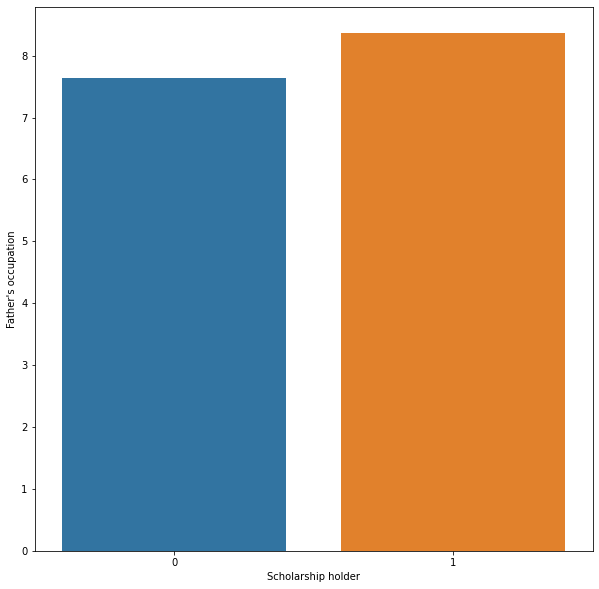

In [10]:
plt.figure(figsize = (10,10))
sns.barplot(y="Father's occupation",x='Scholarship holder', errorbar = None, data = df)

<Axes: xlabel='Scholarship holder', ylabel="Mother's occupation">

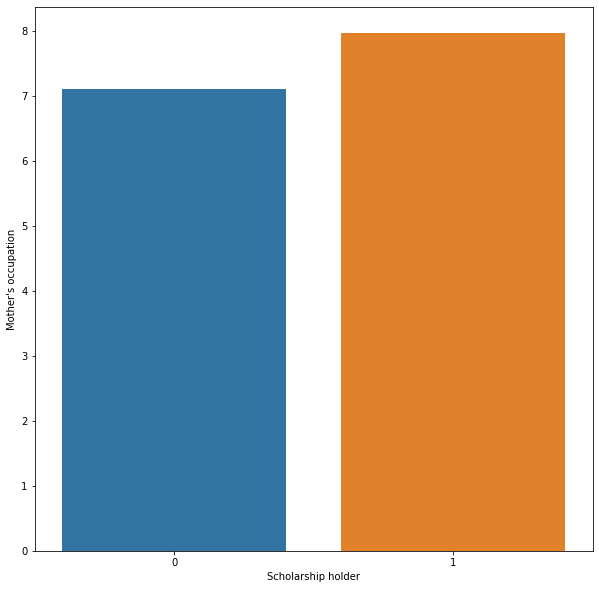

In [11]:
plt.figure(figsize = (10,10))
sns.barplot(y = "Mother's occupation", x = 'Scholarship holder',errorbar=None, data = df)

<Axes: xlabel='Scholarship holder', ylabel="Mother's qualification">

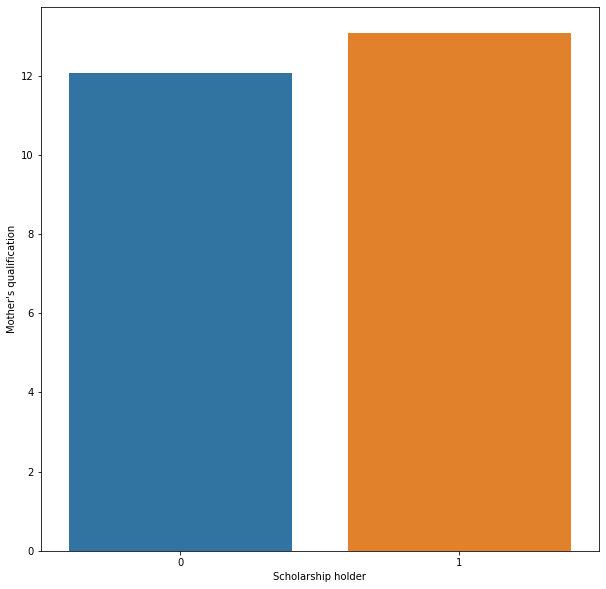

In [12]:
plt.figure(figsize = (10,10))
sns.barplot(y = "Mother's qualification", x = 'Scholarship holder',errorbar=None, data = df)

<Axes: xlabel='Scholarship holder', ylabel="Father's occupation">

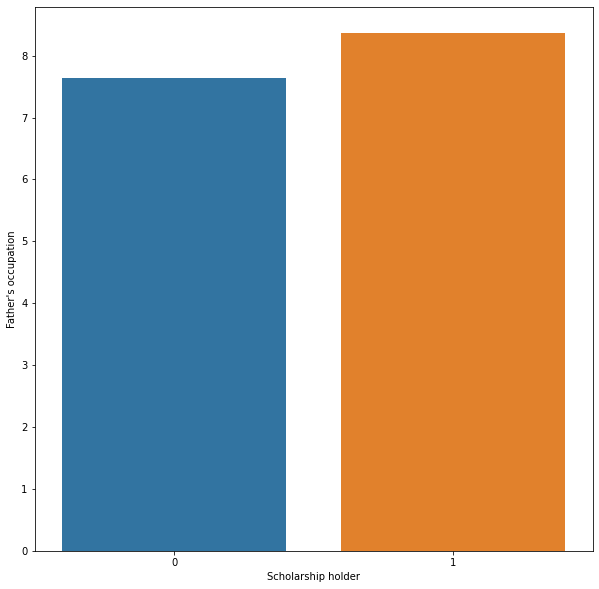

In [13]:
plt.figure(figsize = (10,10))
sns.barplot(y = "Father's occupation", x  = 'Scholarship holder', errorbar = None, data = df)

<Axes: xlabel='Age at enrollment', ylabel='Count'>

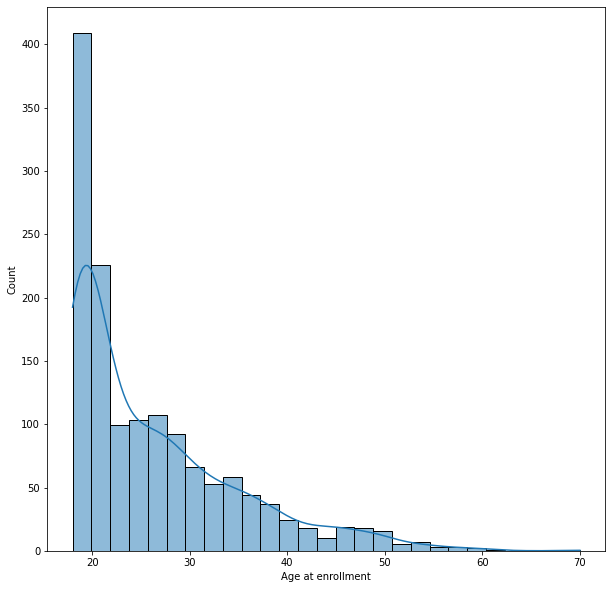

In [14]:
targeted0 = df[df["Target"]==0]
plt.figure(figsize = (10,10))
sns.histplot(data = targeted0, x = 'Age at enrollment', kde = True)

<Axes: xlabel='Age at enrollment', ylabel='Count'>

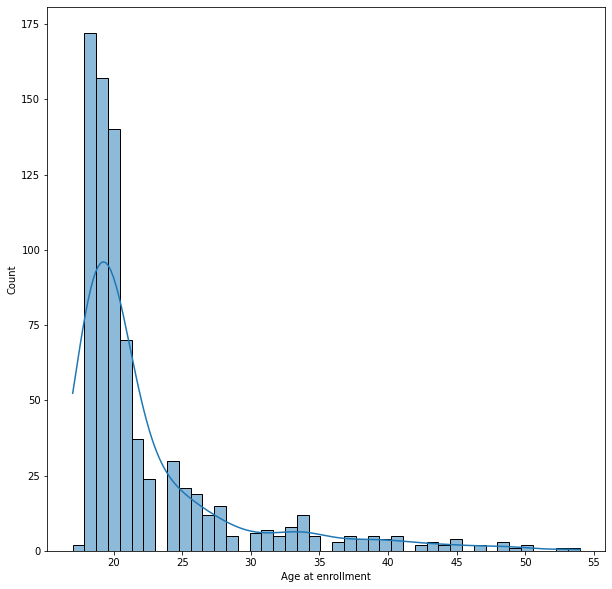

In [15]:
targeted1 = df[df['Target'] == 1]
plt.figure(figsize = (10,10))
sns.histplot(data = targeted1, x = 'Age at enrollment', kde = True)

In [16]:
correlations = df.drop(['Tuition fees up to date',
               'Curricular units 1st sem (credited)',               
                'Curricular units 1st sem (enrolled)',             
                'Curricular units 1st sem (evaluations)',  
'Curricular units 1st sem (approved)',  
'Curricular units 1st sem (grade)',  
'Curricular units 1st sem (without evaluations)',  
'Curricular units 2nd sem (credited)',  
'Curricular units 2nd sem (enrolled)',  
'Curricular units 2nd sem (evaluations)',  
'Curricular units 2nd sem (approved)',  
'Curricular units 2nd sem (grade)',  
                'Curricular units 2nd sem (grade)',
'Curricular units 2nd sem (without evaluations)'],axis=1)

In [17]:
correlations.head()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Nationality,Mother's qualification,Father's qualification,Mother's occupation,Father's occupation,Displaced,Educational special needs,Debtor,Gender,Scholarship holder,Age at enrollment,International,Unemployment rate,Inflation rate,GDP,Target
0,1,8,5,2,1,1,1,13,10,6,10,1,0,0,1,0,20,0,10.8,1.4,1.74,0
1,1,6,1,11,1,1,1,1,3,4,4,1,0,0,1,0,19,0,13.9,-0.3,0.79,2
2,1,1,5,5,1,1,1,22,27,10,10,1,0,0,1,0,19,0,10.8,1.4,1.74,0
3,1,8,2,15,1,1,1,23,27,6,4,1,0,0,0,0,20,0,9.4,-0.8,-3.12,2
4,2,12,1,3,0,1,1,22,28,10,10,0,0,0,0,0,45,0,13.9,-0.3,0.79,2


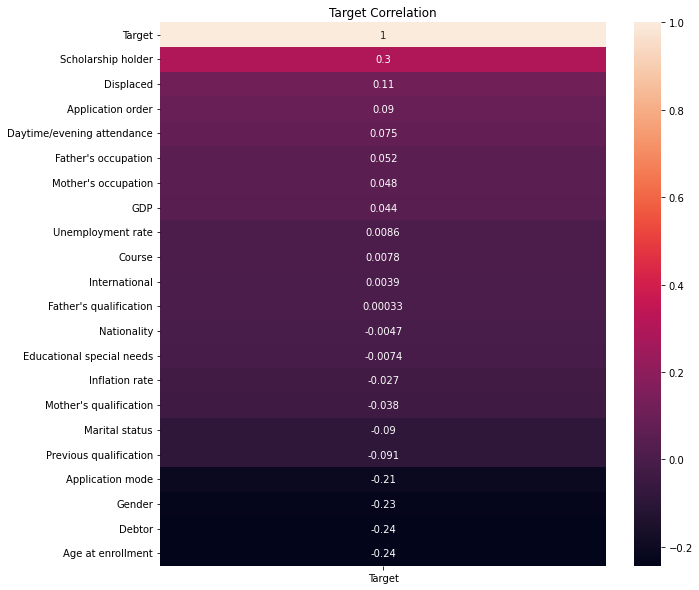

In [18]:
# It appears that "Scholarship holder" has the highest correlation with the "Target" variable
plt.figure(figsize = (10,10))
sns.heatmap(correlations.corr()[['Target']].sort_values(by='Target', ascending=False), annot = True)
plt.title('Target Correlation')
plt.show()

<Axes: xlabel='Unemployment rate', ylabel='GDP'>

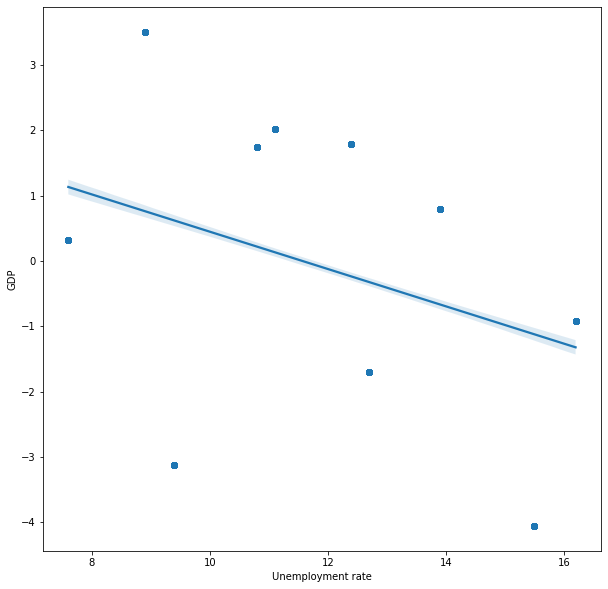

In [19]:
plt.figure(figsize = (10,10))
sns.regplot(data = df, x = 'Unemployment rate', y = 'GDP')

<Axes: xlabel='Gender', ylabel='count'>

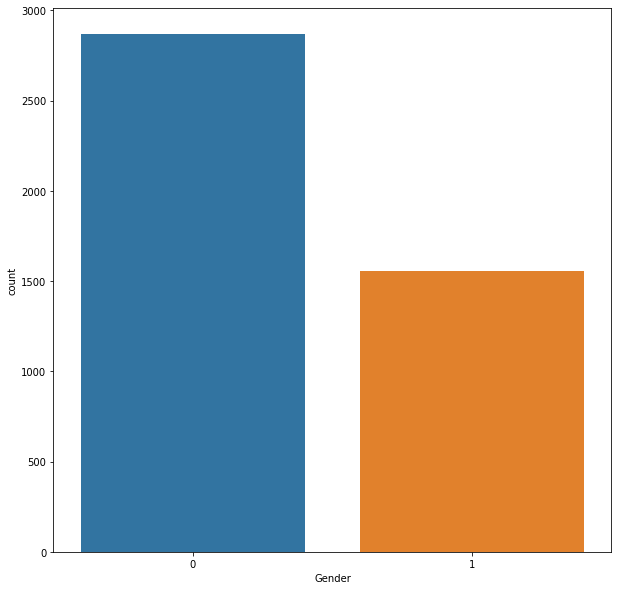

In [20]:
plt.figure(figsize = (10,10))
sns.countplot(data = df, x = 'Gender')

In [21]:
df['Target'].value_counts()

2    2209
0    1421
1     794
Name: Target, dtype: int64

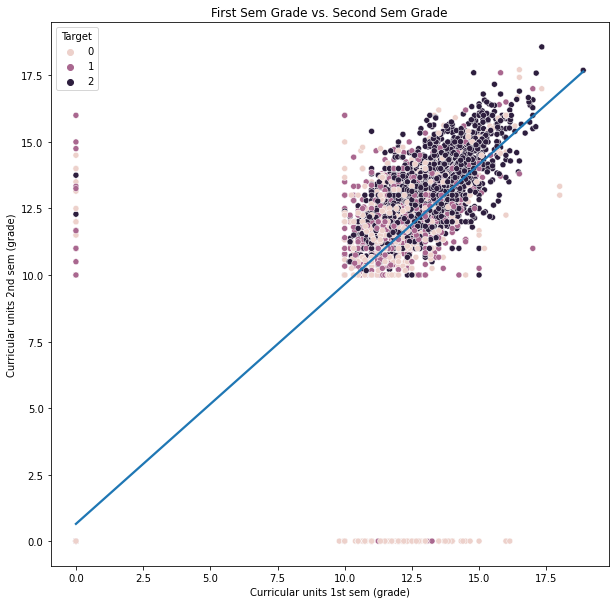

In [22]:
# Plotting the first semester and second semester grades with one another
plt.figure(figsize = (10,10))
sns.scatterplot(df, 
             x = 'Curricular units 1st sem (grade)',
             y = 'Curricular units 2nd sem (grade)',
             hue = 'Target'
             )
plt.title('First Sem Grade vs. Second Sem Grade')

sns.regplot(data = df, 
            x = 'Curricular units 1st sem (grade)', 
            y = 'Curricular units 2nd sem (grade)', 
            scatter = False,
            ci = False 
            )
plt.show()


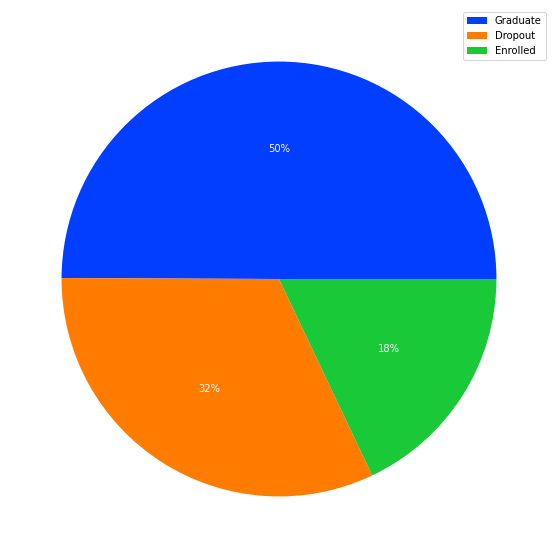

In [96]:
# Creating a pie chart to see the percentage distribution per target variable
x = dropout['Target'].value_counts().index
y = dropout['Target'].value_counts().values

df1 = pd.DataFrame({
    'Target': x,
    'Counted' : y
})

plt.figure(figsize = (10,10))
palette_color = sns.color_palette('bright')

plt.pie(y, 
        labels = x, 
        colors=palette_color, 
        autopct='%.0f%%',
        textprops={'color':"w"})
plt.legend(loc = 'best')


plt.show()

<Axes: xlabel='Marital status'>

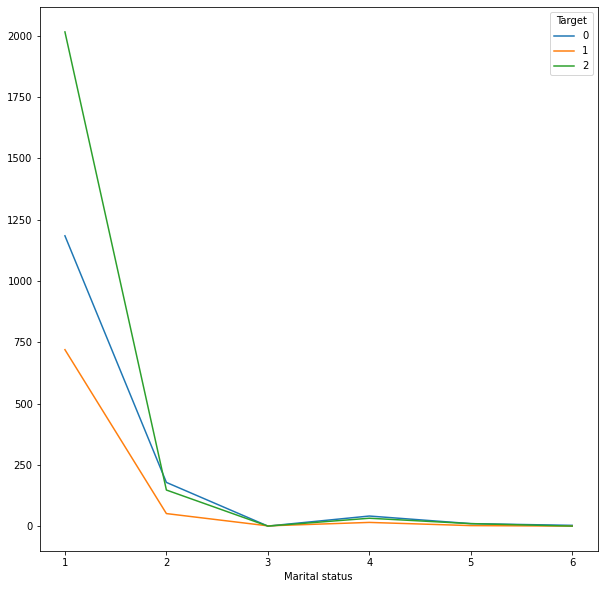

In [103]:
plt.rcParams["figure.figsize"] = (10,10)
pd.crosstab(index=df['Marital status'],columns=df['Target']).plot(kind='line')

### Test, train, split to avoid overfitting and prediciting the target

In [23]:
X_train,X_test,y_train,y_test=train_test_split(df.drop(labels=['Target'], axis=1),
    df['Target'],
    test_size=0.3,
    random_state=0)

### Logistic Regression

In [97]:
lr = LogisticRegression(solver='lbfgs', max_iter = 3000)
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
print('No CV score: ', accuracy_score(y_test,y_pred))
cvscore = cross_val_score(lr, X_train, y_train, cv = 10)
print('Using CV score: ', cvscore.mean())

lr_score = lr.score(X_test, y_test)

No CV score:  0.7831325301204819
Using CV score:  0.763253993109928


### SGD: Stochastic Gradient Descent

In [25]:
sgd = SGDClassifier(max_iter = 1000)
sgd.fit(X_train, y_train)
y_pred = sgd.predict(X_test)
print("No CV: ",accuracy_score(y_test,y_pred))
cvscore = cross_val_score(sgd, X_train, y_train, cv = 10)
print('Using CV score: ', cvscore.mean())

sgd_score = sgd.score(X_test, y_test)
print(sgd_score)


No CV:  0.7612951807228916
Using CV score:  0.6669965549639837
0.7612951807228916


### Decision Tree Classifier

In [26]:
dtc = DecisionTreeClassifier(random_state = 0)
dtc.fit(X_train, y_train)
y_pred = dtc.predict(X_test)
print("No CV: ",accuracy_score(y_test,y_pred))
cvscore = cross_val_score(dtc, X_train, y_train, cv = 10)
print('Using CV score: ', cvscore.mean())
dtc_score = dtc.score(X_test,y_test)
print(dtc_score)

No CV:  0.6942771084337349
Using CV score:  0.6854337613529595
0.6942771084337349


### Random Forest Classifier

In [27]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
print("No CV: ",accuracy_score(y_test,y_pred))
cvscore = cross_val_score(rf, X_train, y_train, cv = 10)
print('Using CV score: ', cvscore.mean())
rf_score = rf.score(X_test,y_test)
print(rf_score)

No CV:  0.7846385542168675
Using CV score:  0.7555037060235932
0.7846385542168675


### Naive Bayes

In [28]:
from sklearn.naive_bayes import GaussianNB
gauss = GaussianNB()
gauss.fit(X_test,y_test)
y_pred = gauss.predict(X_test)
print("No CV: ",accuracy_score(y_test,y_pred))
cvscore = cross_val_score(gauss, X_train, y_train, cv = 10)
print('Using CV score: ', cvscore.mean())
gauss_score = gauss.score(X_test,y_test)
print(gauss_score)


No CV:  0.7018072289156626
Using CV score:  0.6786209416431778
0.7018072289156626


In [29]:
from sklearn.naive_bayes import BernoulliNB
bern = BernoulliNB()
bern.fit(X_test, y_test)
y_pred = bern.predict(X_test)
print("No CV: ",accuracy_score(y_test,y_pred))
cvscore = cross_val_score(bern, X_train, y_train, cv = 10)
print('Using CV score: ', cvscore.mean())
bern_score = bern.score(X_test,y_test)
print(bern_score)

No CV:  0.6859939759036144
Using CV score:  0.6789435222883391
0.6859939759036144


### K Nearest Neighbors

In [30]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3)

knn.fit(X_train,y_train)
y_pred = knn.predict(X_test)
print("Without Scaling and without CV: ",accuracy_score(y_test,y_pred))
scores = cross_val_score(knn, X_train, y_train, cv=10)
print("Without Scaling and With CV: ",scores.mean())
knn_score = knn.score(X_test,y_test)
print(knn_score)

Without Scaling and without CV:  0.670933734939759
Without Scaling and With CV:  0.6466468316108153
0.670933734939759


### XGBoost with GridSearchCV

In [42]:
from xgboost import XGBRegressor
xgb_model = XGBRegressor(random_state = 2000)
search_space = {
    'n_estimators' : [100,200,500],
    'max_depth' : [3,6,9],
    'gamma' : [.001,.1],
    'learning_rate': [.001,.01,.1,1]

}



In [45]:
GS = GridSearchCV(estimator = xgb_model,
                  param_grid = search_space,
                  scoring = ['r2', 'neg_root_mean_squared_error'],
                  refit = 'r2',
                  cv = 5,
                  verbose = 4
                  )

In [46]:
GS.fit(X_train, y_train)

Fitting 5 folds for each of 72 candidates, totalling 360 fits
[CV 1/5] END gamma=0.001, learning_rate=0.001, max_depth=3, n_estimators=100; neg_root_mean_squared_error: (test=-1.019) r2: (test=-0.263) total time=   0.2s
[CV 2/5] END gamma=0.001, learning_rate=0.001, max_depth=3, n_estimators=100; neg_root_mean_squared_error: (test=-1.043) r2: (test=-0.399) total time=   0.1s
[CV 3/5] END gamma=0.001, learning_rate=0.001, max_depth=3, n_estimators=100; neg_root_mean_squared_error: (test=-1.067) r2: (test=-0.472) total time=   0.1s
[CV 4/5] END gamma=0.001, learning_rate=0.001, max_depth=3, n_estimators=100; neg_root_mean_squared_error: (test=-1.049) r2: (test=-0.446) total time=   0.1s
[CV 5/5] END gamma=0.001, learning_rate=0.001, max_depth=3, n_estimators=100; neg_root_mean_squared_error: (test=-1.032) r2: (test=-0.340) total time=   0.1s
[CV 1/5] END gamma=0.001, learning_rate=0.001, max_depth=3, n_estimators=200; neg_root_mean_squared_error: (test=-0.954) r2: (test=-0.107) total tim

GridSearchCV(cv=5,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None, gpu_id=None,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, m...
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None, n_estimators=100,
                                    n_jobs=None, num_parallel_tree=None,
                                    predictor=None, random_state=2000, ...),
             param_grid={'gamma': [0.001, 0.1],
                         'learning_rate': [0.001, 0.01, 0.1, 1],
                         'max_depth': [3, 6, 9],
                         'n_estimators': [100, 200, 500]},
             refit='r2', scoring=['r2', 'neg_root_mean_squared_error'],
             verbose=4)

In [47]:
# Obtaining details of the best model
print(GS.best_estimator_) 

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=0.001, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=3, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=200, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=2000, ...)


In [48]:
print(GS.best_params_)

{'gamma': 0.001, 'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 200}


In [51]:
print(GS.best_score_)
GS_score = GS.best_score_

0.6204081652069265


# Model Selection

### Creating a DataFrame to list all models and their corresponding accuracy score for model selection.

In [52]:
d = {'Logistic Regression': lr_score, 'SGD': sgd_score, 'Decision Tree': dtc_score, 'Random Forest Classifier': rf_score, 'Naive Bayes (Gaussian)': gauss_score, 'Naive Bayes (Bernoulli)': bern_score, 'K Nearest Neighbors': knn_score, 'XGBOOST': GS_score}
scores = pd.DataFrame(data = d, index = [0])
scores = scores.transpose()
scores

,0
Logistic Regression,0.783133
SGD,0.761295
Decision Tree,0.694277
Random Forest Classifier,0.784639
Naive Bayes (Gaussian),0.701807
Naive Bayes (Bernoulli),0.685994
K Nearest Neighbors,0.670934
XGBOOST,0.620408


In [53]:
scores.rename(index = str, columns = {0 : 'Accuracy Scores'}, inplace = True)
scores.index.names = ['Models']
scores.reset_index(inplace = True)
scores

,Models,Accuracy Scores
0,Logistic Regression,0.783133
1,SGD,0.761295
2,Decision Tree,0.694277
3,Random Forest Classifier,0.784639
4,Naive Bayes (Gaussian),0.701807
5,Naive Bayes (Bernoulli),0.685994
6,K Nearest Neighbors,0.670934
7,XGBOOST,0.620408


In [54]:
scores.sort_values(by = 'Accuracy Scores', inplace = True, ascending = False)

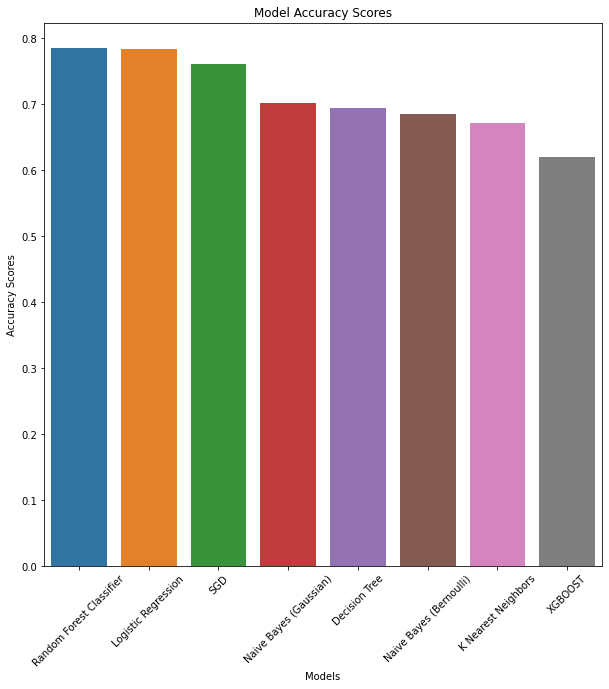

In [55]:
plt.figure(figsize = (10,10))
sns.barplot(data = scores, x = 'Models', y = 'Accuracy Scores')
plt.title('Model Accuracy Scores')
plt.xticks(rotation = 45)
plt.show()


In [35]:
# The Random Forest Classifier has the highest accuracy score compared to the other models.

### Use the Random Forest Classifier because it has the highest accuracy score.

In [36]:
from sklearn.metrics import classification_report
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
print("No CV: ",accuracy_score(y_test,y_pred))
cvscore = cross_val_score(rf, X_train, y_train, cv = 10)
print('Using CV score: ', cvscore.mean())


No CV:  0.7846385542168675
Using CV score:  0.7635734419041652


In [37]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.82      0.76      0.79       428
           1       0.59      0.39      0.47       233
           2       0.81      0.94      0.87       667

    accuracy                           0.78      1328
   macro avg       0.74      0.70      0.71      1328
weighted avg       0.77      0.78      0.77      1328



In [65]:
# Generating Trees
n_estimators = [int(x) for x in np.linspace(start = 10, stop = 80, num = 10)]
# Number of features per split
max_features = ['sqrt']
# Max tree levels
max_depth = [2,4]
# Minimum samples to split node
min_samples_split = [2,5]
# Min samples per leaf node
min_samples_leaf = [1,2]
# Sample method to selecting samples for each tree training
bootstrap = [True, False]

In [66]:
# Param Grid
param_grid = {
    'n_estimators': n_estimators,
    'max_features': max_features,
    'max_depth': max_depth,
    'min_samples_split': min_samples_split,
    'min_samples_leaf': min_samples_leaf,
    'bootstrap': bootstrap
}
print(param_grid)

{'n_estimators': [10, 17, 25, 33, 41, 48, 56, 64, 72, 80], 'max_features': ['sqrt'], 'max_depth': [2, 4], 'min_samples_split': [2, 5], 'min_samples_leaf': [1, 2], 'bootstrap': [True, False]}


In [67]:
rf = RandomForestClassifier()

In [70]:
rf_grid = GridSearchCV(estimator = rf, param_grid = param_grid, cv = 3, verbose = 2, n_jobs = 4)

In [71]:
rf_grid.fit(X_train, y_train)

Fitting 3 folds for each of 160 candidates, totalling 480 fits
[CV] END bootstrap=True, max_depth=2, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END bootstrap=True, max_depth=2, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END bootstrap=True, max_depth=2, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END bootstrap=True, max_depth=2, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=17; total time=   0.0s
[CV] END bootstrap=True, max_depth=2, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=17; total time=   0.0s
[CV] END bootstrap=True, max_depth=2, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=17; total time=   0.0s
[CV] END bootstrap=True, max_depth=2, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=25; total time=   0.1s

GridSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=4,
             param_grid={'bootstrap': [True, False], 'max_depth': [2, 4],
                         'max_features': ['sqrt'], 'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 5],
                         'n_estimators': [10, 17, 25, 33, 41, 48, 56, 64, 72,
                                          80]},
             verbose=2)

In [72]:
rf_grid.best_params_

{'bootstrap': True,
 'max_depth': 4,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 5,
 'n_estimators': 41}

In [73]:
print(f'Train Accuracy: {rf_grid.score(X_train,y_train):.3f}')
print(f'Test Accuracy: {rf_grid.score(X_test,y_test):.3f}')

Train Accuracy: 0.729
Test Accuracy: 0.740


In [75]:
rf_model = RandomForestClassifier(bootstrap =  True,
 max_depth= 4,
 max_features= 'sqrt',
 min_samples_leaf = 1,
 min_samples_split =  5,
 n_estimators =  41, random_state = 0)

rf_model.fit(X_train,y_train)
y_pred = rf_model.predict(X_test)
print("No CV: ",accuracy_score(y_test,y_pred))
finalScore = cross_val_score(rf_model, X_train, y_train, cv=10)
print("With CV: ",finalScore.mean())

No CV:  0.7469879518072289
With CV:  0.7293360476041342


In [76]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.74      0.81      0.77       428
           1       0.60      0.04      0.07       233
           2       0.75      0.96      0.84       667

    accuracy                           0.75      1328
   macro avg       0.70      0.60      0.56      1328
weighted avg       0.72      0.75      0.68      1328

